# About this Lab
** For this lab, I will use decision tree, and K-nearest neighbors (KNN) models, and logistic regression to predict whether a passenger survived or not based on various features of Titanic dataset such as age, sex, ticket class, and more. Besides, I will visualizing decision boundaries (in the case of Decision Trees) and interpreting model performance through metrics like accuracy, confusion matrix, classification report, and feature importance.**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

In [3]:
# Display the first few rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Exploratory Data Analysis
print(titanic.info())
print(titanic.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Data Visualization

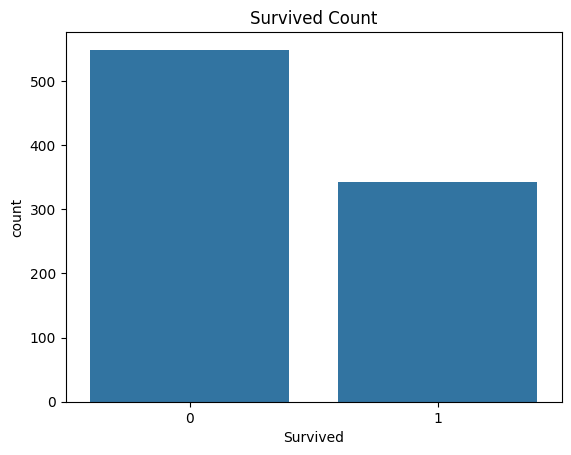

In [8]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survived Count')
plt.show()

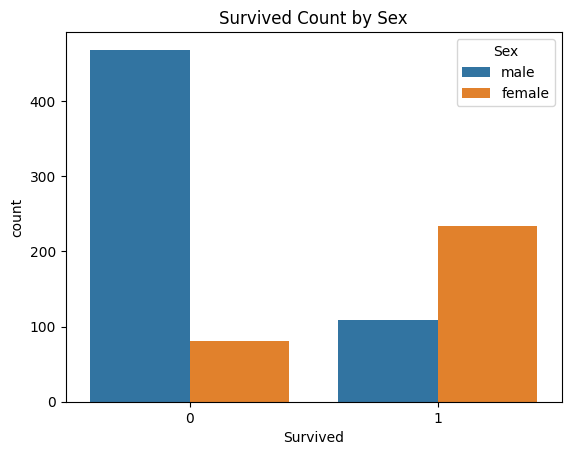

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survived Count by Sex')
plt.show()

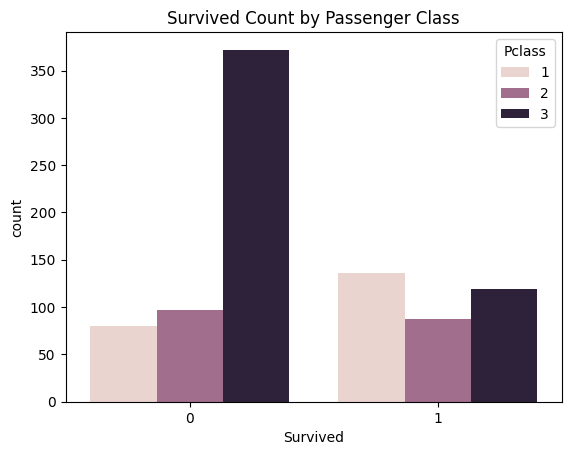

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survived Count by Passenger Class')
plt.show()

# Data Processing

In [15]:
# Define features and target variable
X = titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = titanic['Survived']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
# Define numerical and categorical columns
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [40]:
# Preprocessing pipeline for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),# SimpleImputer handles missing values in the data
    ('scaler', StandardScaler())
])


In [41]:
# Preprocessing pipeline for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [42]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)


# Using Models

In [49]:
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=32))
])


In [63]:
# Train and evaluate Decision Tree model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy: 0.753731343283582
Confusion Matrix:
[[128  25]
 [ 41  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       153
           1       0.75      0.64      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



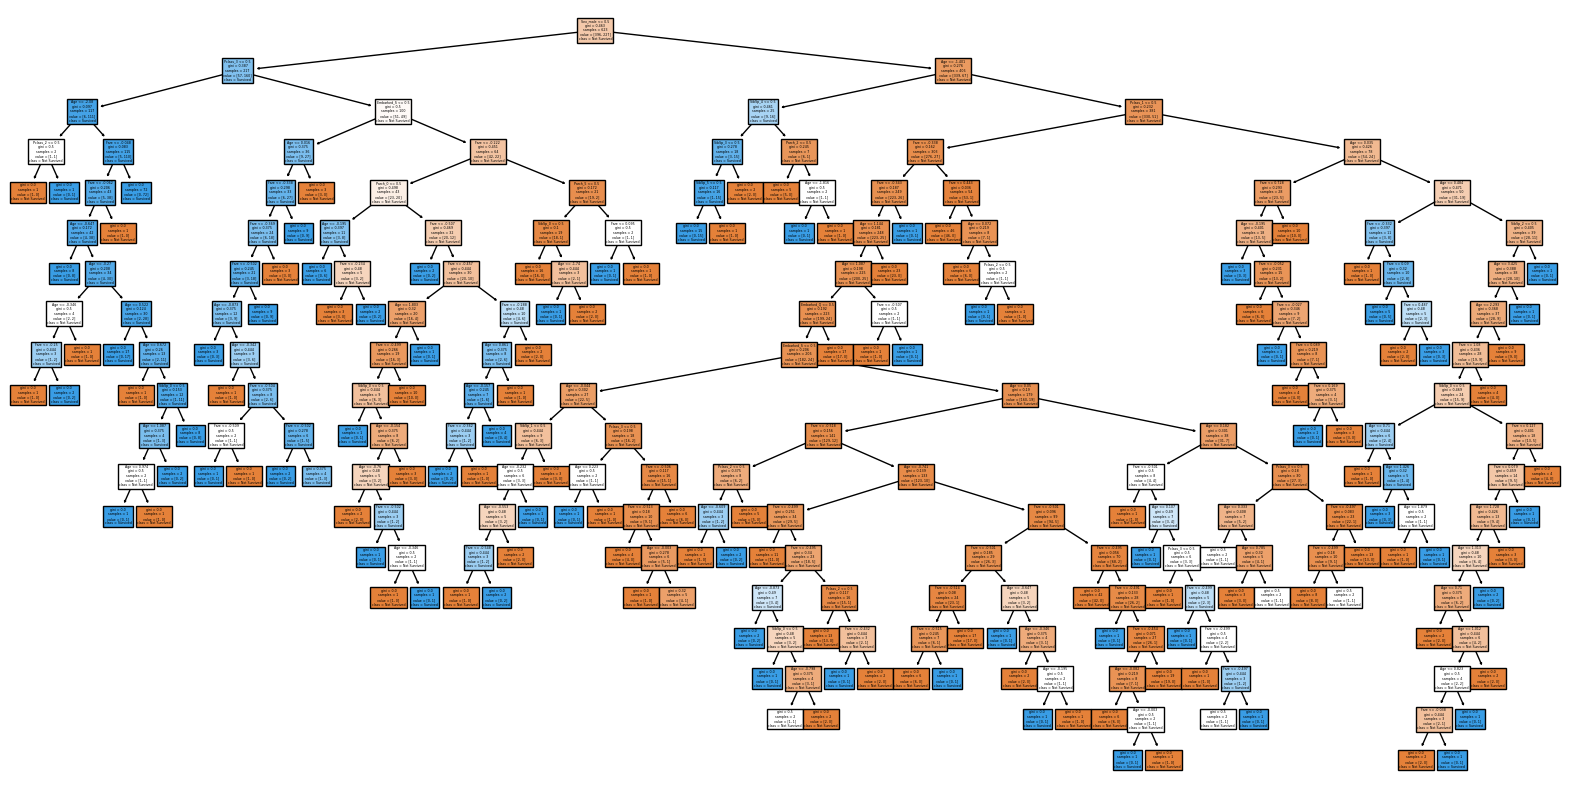

In [64]:
# Fit the preprocessor on training data
preprocessor.fit(X_train)

# Obtain feature names after transformation
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols))

# Plot the decision tree
dt = dt_model.named_steps['classifier']
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=feature_names, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [65]:
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [66]:
# Train and evaluate KNN model
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nK-Nearest Neighbors Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classifier
Accuracy: 0.7761194029850746
Confusion Matrix:
[[134  19]
 [ 41  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [67]:
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [68]:
# Train and evaluate Logistic Regression model
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.7761194029850746
Confusion Matrix:
[[131  22]
 [ 38  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       153
           1       0.78      0.67      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [69]:
# Factors that help to interpret the Logistic Regression model
log_reg_model = log_reg.named_steps['classifier']
log_reg_coef = log_reg_model.coef_[0]
features = num_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols))
feature_importance = pd.Series(log_reg_coef, index=features).sort_values(ascending=False)
print("Logistic Regression Feature Importance:")
print(feature_importance)

Logistic Regression Feature Importance:
Sex_female    1.328045
SibSp_1       1.092993
Pclass_1      1.024812
SibSp_0       0.893401
Parch_1       0.501237
Parch_3       0.361506
SibSp_2       0.277810
Embarked_Q    0.216519
Parch_2       0.164005
Pclass_2      0.133652
Embarked_C    0.083300
Parch_5       0.074490
Fare         -0.000435
Parch_0      -0.025034
SibSp_4      -0.191382
Embarked_S   -0.300051
Parch_6      -0.352027
SibSp_5      -0.441850
SibSp_8      -0.504332
Age          -0.505346
Parch_4      -0.724409
SibSp_3      -1.126872
Pclass_3     -1.158696
Sex_male     -1.328277
dtype: float64


In [70]:
# Factors that help to interpret the Logistic Regression model
log_reg_model = log_reg.named_steps['classifier']
log_reg_coef = log_reg_model.coef_[0]

In [71]:
# Create a DataFrame to map coefficients to feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg_coef
})

In [72]:
# Sort the DataFrame by the absolute value of coefficients
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

In [73]:
# Print the DataFrame
print("Logistic Regression Feature Importance:")
print(coef_df)

Logistic Regression Feature Importance:
       Feature  Coefficient  AbsCoefficient
6     Sex_male    -1.328277        1.328277
5   Sex_female     1.328045        1.328045
4     Pclass_3    -1.158696        1.158696
10     SibSp_3    -1.126872        1.126872
8      SibSp_1     1.092993        1.092993
2     Pclass_1     1.024812        1.024812
7      SibSp_0     0.893401        0.893401
18     Parch_4    -0.724409        0.724409
0          Age    -0.505346        0.505346
13     SibSp_8    -0.504332        0.504332
15     Parch_1     0.501237        0.501237
12     SibSp_5    -0.441850        0.441850
17     Parch_3     0.361506        0.361506
20     Parch_6    -0.352027        0.352027
23  Embarked_S    -0.300051        0.300051
9      SibSp_2     0.277810        0.277810
22  Embarked_Q     0.216519        0.216519
11     SibSp_4    -0.191382        0.191382
16     Parch_2     0.164005        0.164005
3     Pclass_2     0.133652        0.133652
21  Embarked_C     0.083300        0

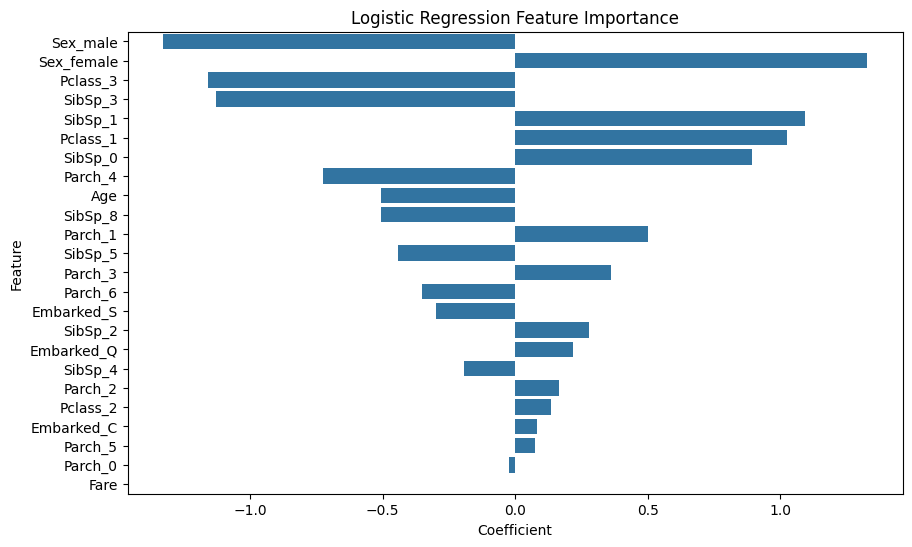

In [74]:
# Plot feature importance for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Feature Importance')
plt.show()